In [1]:
%env OMP_NUM_THREADS=8

env: OMP_NUM_THREADS=8


In [2]:
%pylab inline
import time
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import theano
theano.config.floatX = 'float32'
import theano.tensor as T

Populating the interactive namespace from numpy and matplotlib


In [3]:
from itertools import *

In [4]:
%load_ext autoreload
%autoreload 2

import dem

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
%pylab inline
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

class xgbClf:
    xgb_clf = xgb.XGBClassifier(n_estimators=2000, learning_rate=0.05, max_depth = 5, min_child_weight = 2)
    xtest_ex = []
    def __init__(self, photons_init_str, pi0s_init_str):
        X_train,X_val,y_train,y_val, w_train, w_val = dem.preprocess("../obt_data/RecArea1Pi0.pcl", "../obt_data/RecArea1Ph.pcl")
        self.xtest_ex = X_val
        print "preprocessing succeed"
        a = dem.rev_(X_train)
        print a.shape
        self.xgb_clf.fit(dem.rev_(X_train), y_train, w_train)
        print "fitting succeed"
        valid_answ = self.xgb_clf.predict_proba(dem.rev_(X_val))
        print "On val:", roc_auc_score(y_val, valid_answ[:,1])
        fpr_, tpr_, thresholds_ = roc_curve(y_val, valid_answ[:,1])
        plt.plot(fpr_, tpr_, label="Roc-Curve")
        plt.savefig("1areaNot.png")
        
    def predict_prob(self,test_sample):
        return self.xgb_clf.predict_proba(test_sample)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


X_all shape (239426, 2, 5, 5)
preprocessing succeed
(179569, 50)
fitting succeed
On val: 0.95516034441


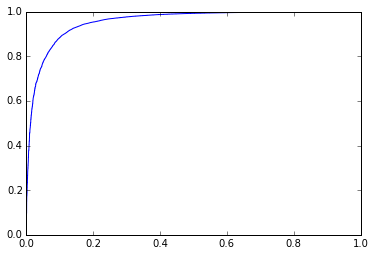

In [6]:
clf = xgbClf("../obt_data/ReconstructionPi0.pcl", "../obt_data/ReconstructionPh.pcl")

X_all shape (152822, 2, 5, 5)
preprocessing succeed
(114616, 50)
fitting succeed
On val: 0.969888681328


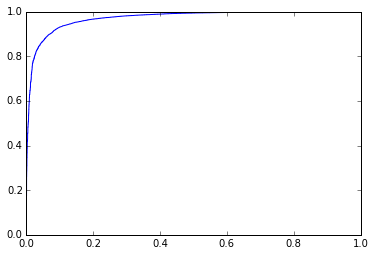

In [15]:
clf = xgbClf("../obt_data/ReconstructionPi0Not.pcl", "../obt_data/ReconstructionPhNOT.pcl")

**Сэмплом**

In [30]:
answ_ex = clf.predict_prob(dem.rev_(clf.xtest_ex))
print len(answ_ex)

5000


** По одному квадрату**

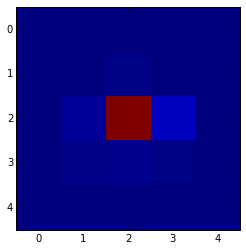

prob [[ 0.16780955  0.83219045]]


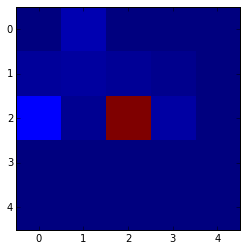

prob [[ 0.1353178  0.8646822]]


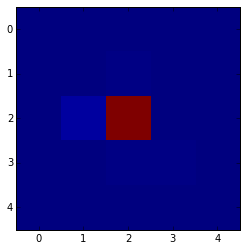

prob [[ 0.02460259  0.97539741]]


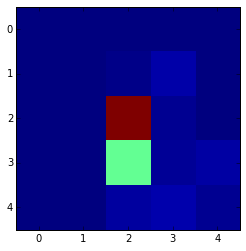

prob [[ 0.01442575  0.98557425]]


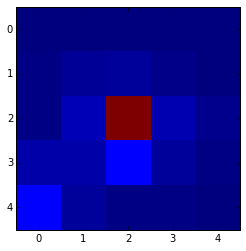

prob [[ 0.04585814  0.95414186]]


In [38]:
import matplotlib.pyplot as plt

for square in clf.xtest_ex[20:25]:
    plt.imshow(square[0].reshape(5,5), interpolation='nearest')
    plt.show()
    print "prob", clf.predict_prob(square.reshape(1,50))